In [1]:
cd C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)


In [2]:
import os

directories = os.listdir()

filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\A
A/A1.jpg
A/A10.jpg
A/A11.jpg
A/A12.jpg
A/A13.jpg
A/A14.jpg
A/A15.jpg
A/A16.jpg
A/A17.jpg
A/A18.jpg
A/A19.jpg
A/A2.jpg
A/A20.jpg
A/A21.jpg
A/A22.jpg
A/A23.jpg
A/A24.jpg
A/A25.jpg
A/A26.jpg
A/A27.jpg
A/A28.jpg
A/A29.jpg
A/A3.jpg
A/A30.jpg
A/A31.jpg
A/A32.jpg
A/A33.jpg
A/A34.jpg
A/A35.jpg
A/A36.jpg
A/A37.jpg
A/A38.jpg
A/A39.jpg
A/A4.jpg
A/A40.jpg
A/A41.jpg
A/A42.jpg
A/A43.jpg
A/A44.jpg
A/A45.jpg
A/A46.jpg
A/A47.jpg
A/A48.jpg
A/A49.jpg
A/A5.jpg
A/A50.jpg
A/A51.jpg
A/A52.jpg
A/A53.jpg
A/A54.jpg
A/A55.jpg
A/A6.jpg
A/A7.jpg
A/A8.jpg
A/A9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\B
B/B1.jpg
B/B10.jpg
B/B11.jpg
B/B12.jpg
B/B13.jpg
B/B14.jpg
B/B15.jpg
B/B16.jpg
B/B17.jpg
B/B18.jpg
B/B19.jpg
B/B2.jpg
B/B20.jpg
B/B21.jpg
B/B22.jpg
B/B23.jpg
B/B24.jpg
B/B25.jpg
B/B26.jpg
B/B27.jpg
B/B28.jpg
B/B29.jpg
B/B3.jpg
B/B30.jpg
B/B31.jpg
B/B32.jpg
B/B33.jpg
B/B34.jpg
B/B35.jpg
B/B36.jpg
B/B37.jpg
B/B38.jp

In [3]:
print(len(filename))

1430


In [4]:
import pandas as pd

data = {"filename": filename,
        "label": label}

df = pd.DataFrame(data = data)

In [5]:
print(df)

       filename label
0      A/A1.jpg     A
1     A/A10.jpg     A
2     A/A11.jpg     A
3     A/A12.jpg     A
4     A/A13.jpg     A
...         ...   ...
1425  Z/Z55.jpg     Z
1426   Z/Z6.jpg     Z
1427   Z/Z7.jpg     Z
1428   Z/Z8.jpg     Z
1429   Z/Z9.jpg     Z

[1430 rows x 2 columns]


In [6]:
#random image list
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

       filename label
891    Q/Q2.jpg     Q
777   O/O16.jpg     O
1155   V/V1.jpg     V
1016  S/S33.jpg     S
964   R/R36.jpg     R
...         ...   ...
363    G/G4.jpg     G
1259  W/W54.jpg     W
477   I/I43.jpg     I
805   O/O41.jpg     O
436    H/H6.jpg     H

[1430 rows x 2 columns]


In [7]:
#cross validation

from sklearn.model_selection import KFold

train_data = df_shuffled

y = train_data[['label']]

# angka split nya 5
kf = KFold(n_splits = 5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [8]:
#preprocessing data train dan data testing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
#define penyimpanan dataset

image_dir = '/Users/USER/Downloads/PROJECT/DATASET_adaptive_mean_thresholding(3)'

In [10]:
#menyimpan model CNN terbaik

def get_model_name(k):
  return 'model_'+str(k)+'.h5'

In [11]:
#define akurasi

import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from pandas.core.algorithms import mode
import tensorflow
# from keras.backend import conv2d
# from warnings import filters
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
# from PIL import Image
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#BUILD AND TRAIN CNN MODEL

save_dir = '/saved_models_32_100_fix/'
fold_var = 1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(y)),y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]
    
    train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir, 
                                                             x_col = "filename", y_col = "label", 
                                                             target_size=(32, 32), batch_size=10, color_mode= "grayscale", 
                                                             class_mode = "categorical", shuffle = True)
    valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir, 
                                                            x_col = "filename", y_col = "label", 
                                                            target_size=(32, 32), batch_size=10, color_mode="grayscale", 
                                                            class_mode = "categorical", shuffle = False)
    

    model = Sequential()
    
    #layer convolution 1
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Conv2D(filters=64, kernel_size=3, input_shape=[32, 32, 1]))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=64, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 2
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 3
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 4
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 5
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Flatten())
    
    #fully connected layer
    model.add(Dense(units=256))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(units=64))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(units=32, activation='relu'))
#     model.add(Dropout(0.40))
#     model.add(Dense(units=64))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.5))
    model.add(Dense(units=26))
    model.add(Activation("softmax"))
    
    model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
    
    checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = "val_accuracy", verbose = 1,
                               save_best_only = True, mode="max")
    
    callback_list = [checkpoint]
    model.summary()
    
    hist = model.fit(train_data_generator, epochs = 100, callbacks = callback_list, validation_data = valid_data_generator)

    model.load_weights("/saved_models_32_100_fix/model_"+str(fold_var)+".h5")

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    y_predict = model.predict(valid_data_generator)

    #get the label of validation data
    y = np.asarray(valid_data_generator.labels)

    #karena output multilabel adalah nilai 0 - 1 dari tiap class maka diambil yang terbesar
    y_predict_labels = np.argmax(y_predict, axis=1)

    acc = accuracy_score(y_predict_labels, y)
    prec = precision_score(y_predict_labels, y, average = "weighted")
    rec = recall_score(y_predict_labels, y, average = "weighted")
    f1score = f1_score(y_predict_labels, y, average = "weighted")

    print("\n")
    print("Cross Validation: ", fold_var)
    print("Accuracy: ", results["accuracy"])
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("f1 score: ", f1score)
    print("\n")

    VALIDATION_ACCURACY.append(results["accuracy"])
    VALIDATION_PRECISION.append(prec)
    VALIDATION_RECALL.append(rec)
    VALIDATION_F1SCORE.append(f1score)

    LOSS.append(hist.history['loss'])
    ACCURACY.append(hist.history['accuracy'])

    VAL_LOSS.append(hist.history['val_loss'])
    VAL_ACCURACY.append(hist.history['val_accuracy'])

    CV.append("CV" +str(fold_var))

    #     clear_session()

    fold_var += 1

Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 activation (Activation)     (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 64)       0         
 )                                                               
                                                                 

Epoch 7/100
115/115 [==============================] - ETA: 0s - loss: 3.3226 - accuracy: 0.0699
Epoch 7: val_accuracy did not improve from 0.04196
115/115 [==============================] - 86s 746ms/step - loss: 3.3226 - accuracy: 0.0699 - val_loss: 10.0322 - val_accuracy: 0.0315
Epoch 8/100
115/115 [==============================] - ETA: 0s - loss: 3.2715 - accuracy: 0.0804
Epoch 8: val_accuracy did not improve from 0.04196
115/115 [==============================] - 85s 737ms/step - loss: 3.2715 - accuracy: 0.0804 - val_loss: 7.1644 - val_accuracy: 0.0315
Epoch 9/100
115/115 [==============================] - ETA: 0s - loss: 3.2401 - accuracy: 0.0795
Epoch 9: val_accuracy did not improve from 0.04196
115/115 [==============================] - 85s 737ms/step - loss: 3.2401 - accuracy: 0.0795 - val_loss: 15.6937 - val_accuracy: 0.0350
Epoch 10/100
115/115 [==============================] - ETA: 0s - loss: 3.2404 - accuracy: 0.0778
Epoch 10: val_accuracy did not improve from 0.04196
11

115/115 [==============================] - 85s 741ms/step - loss: 2.9459 - accuracy: 0.1031 - val_loss: 38.1442 - val_accuracy: 0.0420
Epoch 36/100
115/115 [==============================] - ETA: 0s - loss: 2.9649 - accuracy: 0.0944
Epoch 36: val_accuracy did not improve from 0.09441
115/115 [==============================] - 82s 713ms/step - loss: 2.9649 - accuracy: 0.0944 - val_loss: 8503804.0000 - val_accuracy: 0.0559
Epoch 37/100
115/115 [==============================] - ETA: 0s - loss: 2.9393 - accuracy: 0.1189
Epoch 37: val_accuracy did not improve from 0.09441
115/115 [==============================] - 83s 718ms/step - loss: 2.9393 - accuracy: 0.1189 - val_loss: 49.6547 - val_accuracy: 0.0420
Epoch 38/100
115/115 [==============================] - ETA: 0s - loss: 2.9205 - accuracy: 0.0962
Epoch 38: val_accuracy did not improve from 0.09441
115/115 [==============================] - 82s 716ms/step - loss: 2.9205 - accuracy: 0.0962 - val_loss: 13.6657 - val_accuracy: 0.0315
Epoch

115/115 [==============================] - ETA: 0s - loss: 2.8454 - accuracy: 0.1294
Epoch 64: val_accuracy did not improve from 0.11189
115/115 [==============================] - 82s 717ms/step - loss: 2.8454 - accuracy: 0.1294 - val_loss: 3.9657 - val_accuracy: 0.0455
Epoch 65/100
115/115 [==============================] - ETA: 0s - loss: 2.8190 - accuracy: 0.1442
Epoch 65: val_accuracy did not improve from 0.11189
115/115 [==============================] - 83s 719ms/step - loss: 2.8190 - accuracy: 0.1442 - val_loss: 7.9122 - val_accuracy: 0.0420
Epoch 66/100
115/115 [==============================] - ETA: 0s - loss: 2.8183 - accuracy: 0.1154
Epoch 66: val_accuracy did not improve from 0.11189
115/115 [==============================] - 83s 718ms/step - loss: 2.8183 - accuracy: 0.1154 - val_loss: 5.4572 - val_accuracy: 0.0559
Epoch 67/100
115/115 [==============================] - ETA: 0s - loss: 2.8211 - accuracy: 0.1259
Epoch 67: val_accuracy did not improve from 0.11189
115/115 [==

Epoch 93/100
115/115 [==============================] - ETA: 0s - loss: 2.7774 - accuracy: 0.1154
Epoch 93: val_accuracy did not improve from 0.12238
115/115 [==============================] - 82s 716ms/step - loss: 2.7774 - accuracy: 0.1154 - val_loss: 5.1775 - val_accuracy: 0.0664
Epoch 94/100
115/115 [==============================] - ETA: 0s - loss: 2.7847 - accuracy: 0.1259
Epoch 94: val_accuracy did not improve from 0.12238
115/115 [==============================] - 82s 717ms/step - loss: 2.7847 - accuracy: 0.1259 - val_loss: 2.9624 - val_accuracy: 0.0909
Epoch 95/100
115/115 [==============================] - ETA: 0s - loss: 2.7860 - accuracy: 0.1346
Epoch 95: val_accuracy improved from 0.12238 to 0.12937, saving model to /saved_models_32_100_fix\model_1.h5
115/115 [==============================] - 82s 717ms/step - loss: 2.7860 - accuracy: 0.1346 - val_loss: 2.7233 - val_accuracy: 0.1294
Epoch 96/100
115/115 [==============================] - ETA: 0s - loss: 2.7810 - accuracy: 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_16 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/100
115/115 [==============================] - ETA: 0s - loss: 3.2667 - accuracy: 0.0769
Epoch 7: val_accuracy did not improve from 0.04196
115/115 [==============================] - 82s 717ms/step - loss: 3.2667 - accuracy: 0.0769 - val_loss: 24.1255 - val_accuracy: 0.0350
Epoch 8/100
115/115 [==============================] - ETA: 0s - loss: 3.2963 - accuracy: 0.0638
Epoch 8: val_accuracy improved from 0.04196 to 0.09790, saving model to /saved_models_32_100_fix\model_2.h5
115/115 [==============================] - 83s 722ms/step - loss: 3.2963 - accuracy: 0.0638 - val_loss: 3.6889 - val_accuracy: 0.0979
Epoch 9/100
115/115 [==============================] - ETA: 0s - loss: 3.2335 - accuracy: 0.0813
Epoch 9: val_accuracy did not improve from 0.09790
115/115 [==============================] - 82s 714ms/step - loss: 3.2335 - accuracy: 0.0813 - val_loss: 21.0092 - val_accuracy: 0.0210
Epoch 10/100
115/115 [==============================] - ETA: 0s - loss: 3.2104 - accuracy: 0.07

Epoch 36/100
115/115 [==============================] - ETA: 0s - loss: 2.9092 - accuracy: 0.1224
Epoch 36: val_accuracy improved from 0.09790 to 0.11189, saving model to /saved_models_32_100_fix\model_2.h5
115/115 [==============================] - 85s 740ms/step - loss: 2.9092 - accuracy: 0.1224 - val_loss: 2.8694 - val_accuracy: 0.1119
Epoch 37/100
115/115 [==============================] - ETA: 0s - loss: 2.9221 - accuracy: 0.1119
Epoch 37: val_accuracy did not improve from 0.11189
115/115 [==============================] - 84s 731ms/step - loss: 2.9221 - accuracy: 0.1119 - val_loss: 3.6821 - val_accuracy: 0.0629
Epoch 38/100
115/115 [==============================] - ETA: 0s - loss: 2.8843 - accuracy: 0.1241
Epoch 38: val_accuracy did not improve from 0.11189
115/115 [==============================] - 82s 713ms/step - loss: 2.8843 - accuracy: 0.1241 - val_loss: 3.4181 - val_accuracy: 0.0455
Epoch 39/100
115/115 [==============================] - ETA: 0s - loss: 2.8975 - accuracy: 

115/115 [==============================] - 83s 720ms/step - loss: 2.8312 - accuracy: 0.1302 - val_loss: 2.7727 - val_accuracy: 0.1469
Epoch 65/100
115/115 [==============================] - ETA: 0s - loss: 2.8483 - accuracy: 0.1259
Epoch 65: val_accuracy did not improve from 0.14685
115/115 [==============================] - 83s 724ms/step - loss: 2.8483 - accuracy: 0.1259 - val_loss: 15.0353 - val_accuracy: 0.0315
Epoch 66/100
115/115 [==============================] - ETA: 0s - loss: 2.8089 - accuracy: 0.1215
Epoch 66: val_accuracy did not improve from 0.14685
115/115 [==============================] - 84s 727ms/step - loss: 2.8089 - accuracy: 0.1215 - val_loss: 3.6023 - val_accuracy: 0.0874
Epoch 67/100
115/115 [==============================] - ETA: 0s - loss: 2.8357 - accuracy: 0.1407
Epoch 67: val_accuracy did not improve from 0.14685
115/115 [==============================] - 86s 748ms/step - loss: 2.8357 - accuracy: 0.1407 - val_loss: 10.2699 - val_accuracy: 0.0350
Epoch 68/100

115/115 [==============================] - 93s 810ms/step - loss: 2.7213 - accuracy: 0.1512 - val_loss: 3.1339 - val_accuracy: 0.1119
Epoch 94/100
115/115 [==============================] - ETA: 0s - loss: 2.7300 - accuracy: 0.1329
Epoch 94: val_accuracy did not improve from 0.14685
115/115 [==============================] - 86s 745ms/step - loss: 2.7300 - accuracy: 0.1329 - val_loss: 5.7762 - val_accuracy: 0.0420
Epoch 95/100
115/115 [==============================] - ETA: 0s - loss: 2.7347 - accuracy: 0.1460
Epoch 95: val_accuracy did not improve from 0.14685
115/115 [==============================] - 83s 724ms/step - loss: 2.7347 - accuracy: 0.1460 - val_loss: 5.9409 - val_accuracy: 0.0420
Epoch 96/100
115/115 [==============================] - ETA: 0s - loss: 2.7457 - accuracy: 0.1460
Epoch 96: val_accuracy did not improve from 0.14685
115/115 [==============================] - 83s 721ms/step - loss: 2.7457 - accuracy: 0.1460 - val_loss: 3.6151 - val_accuracy: 0.0734
Epoch 97/100
1

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_32 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_33 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/100
115/115 [==============================] - ETA: 0s - loss: 3.4143 - accuracy: 0.0542
Epoch 7: val_accuracy did not improve from 0.05944
115/115 [==============================] - 83s 722ms/step - loss: 3.4143 - accuracy: 0.0542 - val_loss: 6.7473 - val_accuracy: 0.0420
Epoch 8/100
115/115 [==============================] - ETA: 0s - loss: 3.3859 - accuracy: 0.0472
Epoch 8: val_accuracy improved from 0.05944 to 0.06294, saving model to /saved_models_32_100_fix\model_3.h5
115/115 [==============================] - 87s 755ms/step - loss: 3.3859 - accuracy: 0.0472 - val_loss: 3.7196 - val_accuracy: 0.0629
Epoch 9/100
115/115 [==============================] - ETA: 0s - loss: 3.2856 - accuracy: 0.0664
Epoch 9: val_accuracy did not improve from 0.06294
115/115 [==============================] - 84s 728ms/step - loss: 3.2856 - accuracy: 0.0664 - val_loss: 3.0715 - val_accuracy: 0.0629
Epoch 10/100
115/115 [==============================] - ETA: 0s - loss: 3.3227 - accuracy: 0.0577

115/115 [==============================] - ETA: 0s - loss: 2.9808 - accuracy: 0.0892
Epoch 35: val_accuracy did not improve from 0.11888
115/115 [==============================] - 83s 724ms/step - loss: 2.9808 - accuracy: 0.0892 - val_loss: 3.7566 - val_accuracy: 0.0455
Epoch 36/100
115/115 [==============================] - ETA: 0s - loss: 2.9504 - accuracy: 0.0979
Epoch 36: val_accuracy did not improve from 0.11888
115/115 [==============================] - 83s 719ms/step - loss: 2.9504 - accuracy: 0.0979 - val_loss: 3.7142 - val_accuracy: 0.0455
Epoch 37/100
115/115 [==============================] - ETA: 0s - loss: 2.9684 - accuracy: 0.1093
Epoch 37: val_accuracy did not improve from 0.11888
115/115 [==============================] - 83s 718ms/step - loss: 2.9684 - accuracy: 0.1093 - val_loss: 2.9938 - val_accuracy: 0.0979
Epoch 38/100
115/115 [==============================] - ETA: 0s - loss: 2.9788 - accuracy: 0.0962
Epoch 38: val_accuracy did not improve from 0.11888
115/115 [==

Epoch 64/100
115/115 [==============================] - ETA: 0s - loss: 2.7874 - accuracy: 0.1320
Epoch 64: val_accuracy did not improve from 0.11888
115/115 [==============================] - 85s 737ms/step - loss: 2.7874 - accuracy: 0.1320 - val_loss: 10.0868 - val_accuracy: 0.0280
Epoch 65/100
115/115 [==============================] - ETA: 0s - loss: 2.8157 - accuracy: 0.1206
Epoch 65: val_accuracy did not improve from 0.11888
115/115 [==============================] - 82s 717ms/step - loss: 2.8157 - accuracy: 0.1206 - val_loss: 3.5634 - val_accuracy: 0.0629
Epoch 66/100
115/115 [==============================] - ETA: 0s - loss: 2.7908 - accuracy: 0.1171
Epoch 66: val_accuracy did not improve from 0.11888
115/115 [==============================] - 82s 718ms/step - loss: 2.7908 - accuracy: 0.1171 - val_loss: 6.0707 - val_accuracy: 0.0524
Epoch 67/100
115/115 [==============================] - ETA: 0s - loss: 2.8034 - accuracy: 0.1215
Epoch 67: val_accuracy did not improve from 0.118

Epoch 93/100
115/115 [==============================] - ETA: 0s - loss: 2.5962 - accuracy: 0.1652
Epoch 93: val_accuracy did not improve from 0.19231
115/115 [==============================] - 83s 719ms/step - loss: 2.5962 - accuracy: 0.1652 - val_loss: 4.6051 - val_accuracy: 0.0629
Epoch 94/100
115/115 [==============================] - ETA: 0s - loss: 2.6201 - accuracy: 0.1617
Epoch 94: val_accuracy did not improve from 0.19231
115/115 [==============================] - 83s 719ms/step - loss: 2.6201 - accuracy: 0.1617 - val_loss: 2.7000 - val_accuracy: 0.1748
Epoch 95/100
115/115 [==============================] - ETA: 0s - loss: 2.6109 - accuracy: 0.1626
Epoch 95: val_accuracy did not improve from 0.19231
115/115 [==============================] - 83s 721ms/step - loss: 2.6109 - accuracy: 0.1626 - val_loss: 2.6396 - val_accuracy: 0.1678
Epoch 96/100
115/115 [==============================] - ETA: 0s - loss: 2.6089 - accuracy: 0.1582
Epoch 96: val_accuracy did not improve from 0.1923

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_48 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/100
115/115 [==============================] - ETA: 0s - loss: 3.3499 - accuracy: 0.0612
Epoch 7: val_accuracy improved from 0.03846 to 0.04545, saving model to /saved_models_32_100_fix\model_4.h5
115/115 [==============================] - 83s 722ms/step - loss: 3.3499 - accuracy: 0.0612 - val_loss: 8.7587 - val_accuracy: 0.0455
Epoch 8/100
115/115 [==============================] - ETA: 0s - loss: 3.3665 - accuracy: 0.0647
Epoch 8: val_accuracy did not improve from 0.04545
115/115 [==============================] - 82s 715ms/step - loss: 3.3665 - accuracy: 0.0647 - val_loss: 8.5383 - val_accuracy: 0.0280
Epoch 9/100
115/115 [==============================] - ETA: 0s - loss: 3.2672 - accuracy: 0.0568
Epoch 9: val_accuracy improved from 0.04545 to 0.04895, saving model to /saved_models_32_100_fix\model_4.h5
115/115 [==============================] - 83s 719ms/step - loss: 3.2672 - accuracy: 0.0568 - val_loss: 8.0452 - val_accuracy: 0.0490
Epoch 10/100
115/115 [==================

Epoch 35/100
115/115 [==============================] - ETA: 0s - loss: 2.9224 - accuracy: 0.1119
Epoch 35: val_accuracy did not improve from 0.09441
115/115 [==============================] - 85s 735ms/step - loss: 2.9224 - accuracy: 0.1119 - val_loss: 4.8543 - val_accuracy: 0.0490
Epoch 36/100
115/115 [==============================] - ETA: 0s - loss: 2.9379 - accuracy: 0.1049
Epoch 36: val_accuracy did not improve from 0.09441
115/115 [==============================] - 83s 719ms/step - loss: 2.9379 - accuracy: 0.1049 - val_loss: 3.5410 - val_accuracy: 0.0769
Epoch 37/100
115/115 [==============================] - ETA: 0s - loss: 2.9339 - accuracy: 0.0927
Epoch 37: val_accuracy did not improve from 0.09441
115/115 [==============================] - 83s 722ms/step - loss: 2.9339 - accuracy: 0.0927 - val_loss: 3.5854 - val_accuracy: 0.0664
Epoch 38/100
115/115 [==============================] - ETA: 0s - loss: 2.9078 - accuracy: 0.1171
Epoch 38: val_accuracy did not improve from 0.0944

Epoch 64/100
115/115 [==============================] - ETA: 0s - loss: 2.8766 - accuracy: 0.1084
Epoch 64: val_accuracy did not improve from 0.09441
115/115 [==============================] - 83s 721ms/step - loss: 2.8766 - accuracy: 0.1084 - val_loss: 3.4648 - val_accuracy: 0.0734
Epoch 65/100
115/115 [==============================] - ETA: 0s - loss: 2.8947 - accuracy: 0.0979
Epoch 65: val_accuracy did not improve from 0.09441
115/115 [==============================] - 84s 726ms/step - loss: 2.8947 - accuracy: 0.0979 - val_loss: 6.4555 - val_accuracy: 0.0490
Epoch 66/100
115/115 [==============================] - ETA: 0s - loss: 2.8713 - accuracy: 0.1084
Epoch 66: val_accuracy did not improve from 0.09441
115/115 [==============================] - 83s 723ms/step - loss: 2.8713 - accuracy: 0.1084 - val_loss: 6.0381 - val_accuracy: 0.0490
Epoch 67/100
115/115 [==============================] - ETA: 0s - loss: 2.8765 - accuracy: 0.1171
Epoch 67: val_accuracy did not improve from 0.0944

115/115 [==============================] - 83s 723ms/step - loss: 2.8255 - accuracy: 0.1285 - val_loss: 6.6415 - val_accuracy: 0.0385
Epoch 93/100
115/115 [==============================] - ETA: 0s - loss: 2.8371 - accuracy: 0.1058
Epoch 93: val_accuracy did not improve from 0.16084
115/115 [==============================] - 83s 722ms/step - loss: 2.8371 - accuracy: 0.1058 - val_loss: 301.6615 - val_accuracy: 0.0490
Epoch 94/100
115/115 [==============================] - ETA: 0s - loss: 2.8085 - accuracy: 0.1241
Epoch 94: val_accuracy did not improve from 0.16084
115/115 [==============================] - 83s 718ms/step - loss: 2.8085 - accuracy: 0.1241 - val_loss: 2.7335 - val_accuracy: 0.1469
Epoch 95/100
115/115 [==============================] - ETA: 0s - loss: 2.7988 - accuracy: 0.1407
Epoch 95: val_accuracy did not improve from 0.16084
115/115 [==============================] - 83s 722ms/step - loss: 2.7988 - accuracy: 0.1407 - val_loss: 4.5048 - val_accuracy: 0.0490
Epoch 96/100

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_64 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_65 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/100
115/115 [==============================] - ETA: 0s - loss: 3.3570 - accuracy: 0.0621
Epoch 7: val_accuracy improved from 0.05944 to 0.08392, saving model to /saved_models_32_100_fix\model_5.h5
115/115 [==============================] - 83s 722ms/step - loss: 3.3570 - accuracy: 0.0621 - val_loss: 6.3407 - val_accuracy: 0.0839
Epoch 8/100
115/115 [==============================] - ETA: 0s - loss: 3.3137 - accuracy: 0.0708
Epoch 8: val_accuracy did not improve from 0.08392
115/115 [==============================] - 84s 732ms/step - loss: 3.3137 - accuracy: 0.0708 - val_loss: 75.3708 - val_accuracy: 0.0559
Epoch 9/100
115/115 [==============================] - ETA: 0s - loss: 3.3067 - accuracy: 0.0699
Epoch 9: val_accuracy did not improve from 0.08392
115/115 [==============================] - 83s 723ms/step - loss: 3.3067 - accuracy: 0.0699 - val_loss: 9.6665 - val_accuracy: 0.0245
Epoch 10/100
115/115 [==============================] - ETA: 0s - loss: 3.2382 - accuracy: 0.072

Epoch 36/100
115/115 [==============================] - ETA: 0s - loss: 2.9443 - accuracy: 0.0997
Epoch 36: val_accuracy did not improve from 0.08392
115/115 [==============================] - 83s 719ms/step - loss: 2.9443 - accuracy: 0.0997 - val_loss: 3.1787 - val_accuracy: 0.0839
Epoch 37/100
115/115 [==============================] - ETA: 0s - loss: 2.8884 - accuracy: 0.1171
Epoch 37: val_accuracy did not improve from 0.08392
115/115 [==============================] - 83s 718ms/step - loss: 2.8884 - accuracy: 0.1171 - val_loss: 5.5760 - val_accuracy: 0.0280
Epoch 38/100
115/115 [==============================] - ETA: 0s - loss: 2.8969 - accuracy: 0.1101
Epoch 38: val_accuracy did not improve from 0.08392
115/115 [==============================] - 83s 718ms/step - loss: 2.8969 - accuracy: 0.1101 - val_loss: 13.5734 - val_accuracy: 0.0245
Epoch 39/100
115/115 [==============================] - ETA: 0s - loss: 2.8340 - accuracy: 0.1320
Epoch 39: val_accuracy did not improve from 0.083

115/115 [==============================] - 83s 719ms/step - loss: 2.8025 - accuracy: 0.1276 - val_loss: 20.0307 - val_accuracy: 0.0245
Epoch 65/100
115/115 [==============================] - ETA: 0s - loss: 2.8053 - accuracy: 0.1346
Epoch 65: val_accuracy did not improve from 0.14336
115/115 [==============================] - 83s 721ms/step - loss: 2.8053 - accuracy: 0.1346 - val_loss: 8.1750 - val_accuracy: 0.0455
Epoch 66/100
115/115 [==============================] - ETA: 0s - loss: 2.8005 - accuracy: 0.1233
Epoch 66: val_accuracy did not improve from 0.14336
115/115 [==============================] - 83s 719ms/step - loss: 2.8005 - accuracy: 0.1233 - val_loss: 5.6176 - val_accuracy: 0.0315
Epoch 67/100
115/115 [==============================] - ETA: 0s - loss: 2.7707 - accuracy: 0.1302
Epoch 67: val_accuracy did not improve from 0.14336
115/115 [==============================] - 83s 719ms/step - loss: 2.7707 - accuracy: 0.1302 - val_loss: 5.9629 - val_accuracy: 0.0420
Epoch 68/100


115/115 [==============================] - ETA: 0s - loss: 2.7285 - accuracy: 0.1451
Epoch 93: val_accuracy did not improve from 0.14336
115/115 [==============================] - 83s 720ms/step - loss: 2.7285 - accuracy: 0.1451 - val_loss: 5268332.0000 - val_accuracy: 0.0944
Epoch 94/100
115/115 [==============================] - ETA: 0s - loss: 2.7557 - accuracy: 0.1469
Epoch 94: val_accuracy did not improve from 0.14336
115/115 [==============================] - 82s 715ms/step - loss: 2.7557 - accuracy: 0.1469 - val_loss: 4.0137 - val_accuracy: 0.0629
Epoch 95/100
115/115 [==============================] - ETA: 0s - loss: 2.7541 - accuracy: 0.1320
Epoch 95: val_accuracy did not improve from 0.14336
115/115 [==============================] - 83s 719ms/step - loss: 2.7541 - accuracy: 0.1320 - val_loss: 2.9155 - val_accuracy: 0.1084
Epoch 96/100
115/115 [==============================] - ETA: 0s - loss: 2.7362 - accuracy: 0.1329
Epoch 96: val_accuracy did not improve from 0.14336
115/1

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


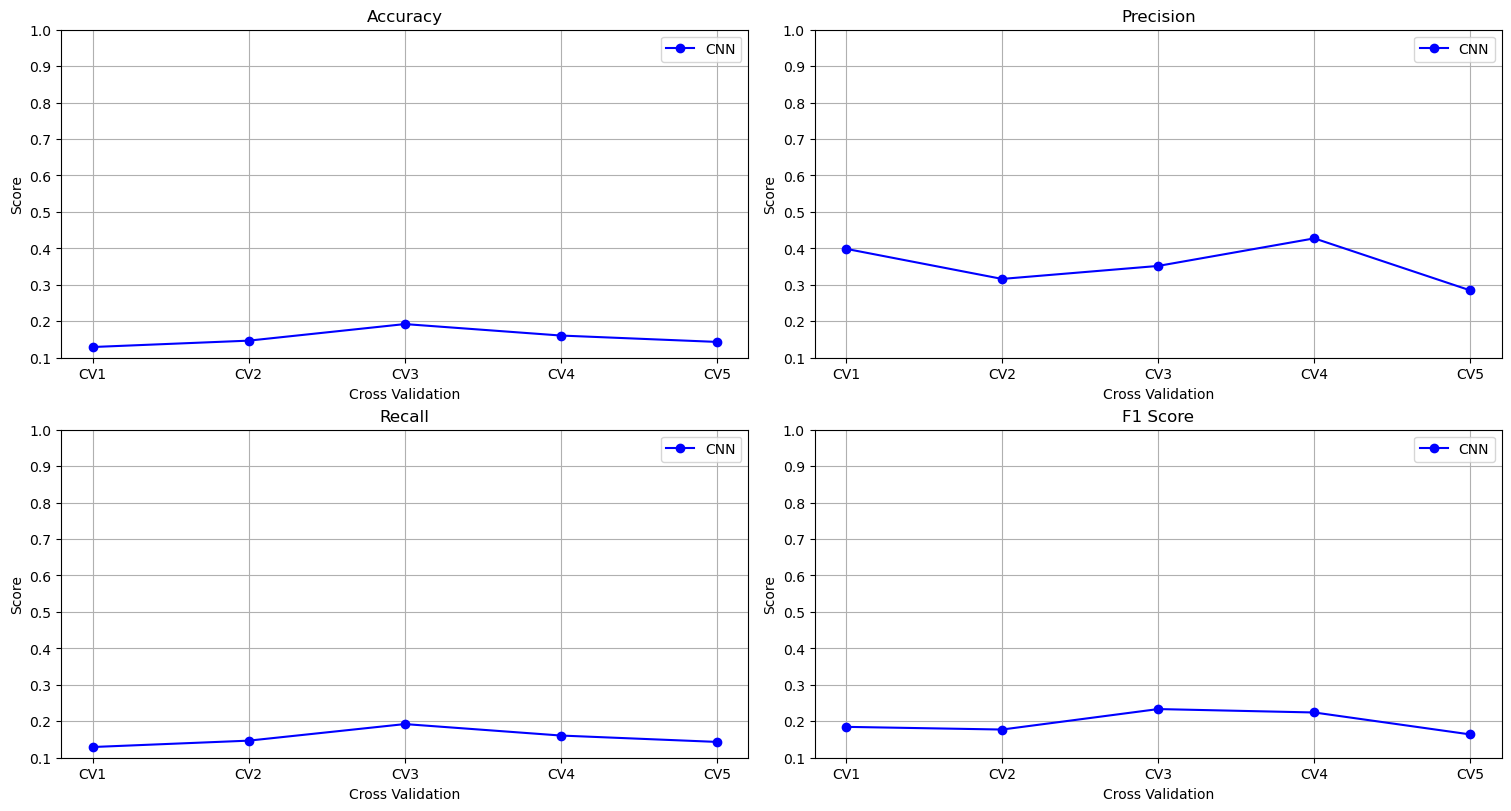

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = "CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.1, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label = "CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.1, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label = "CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.1, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label = "CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.1, 1))
axs[1,1].grid()
axs[1,1].legend()

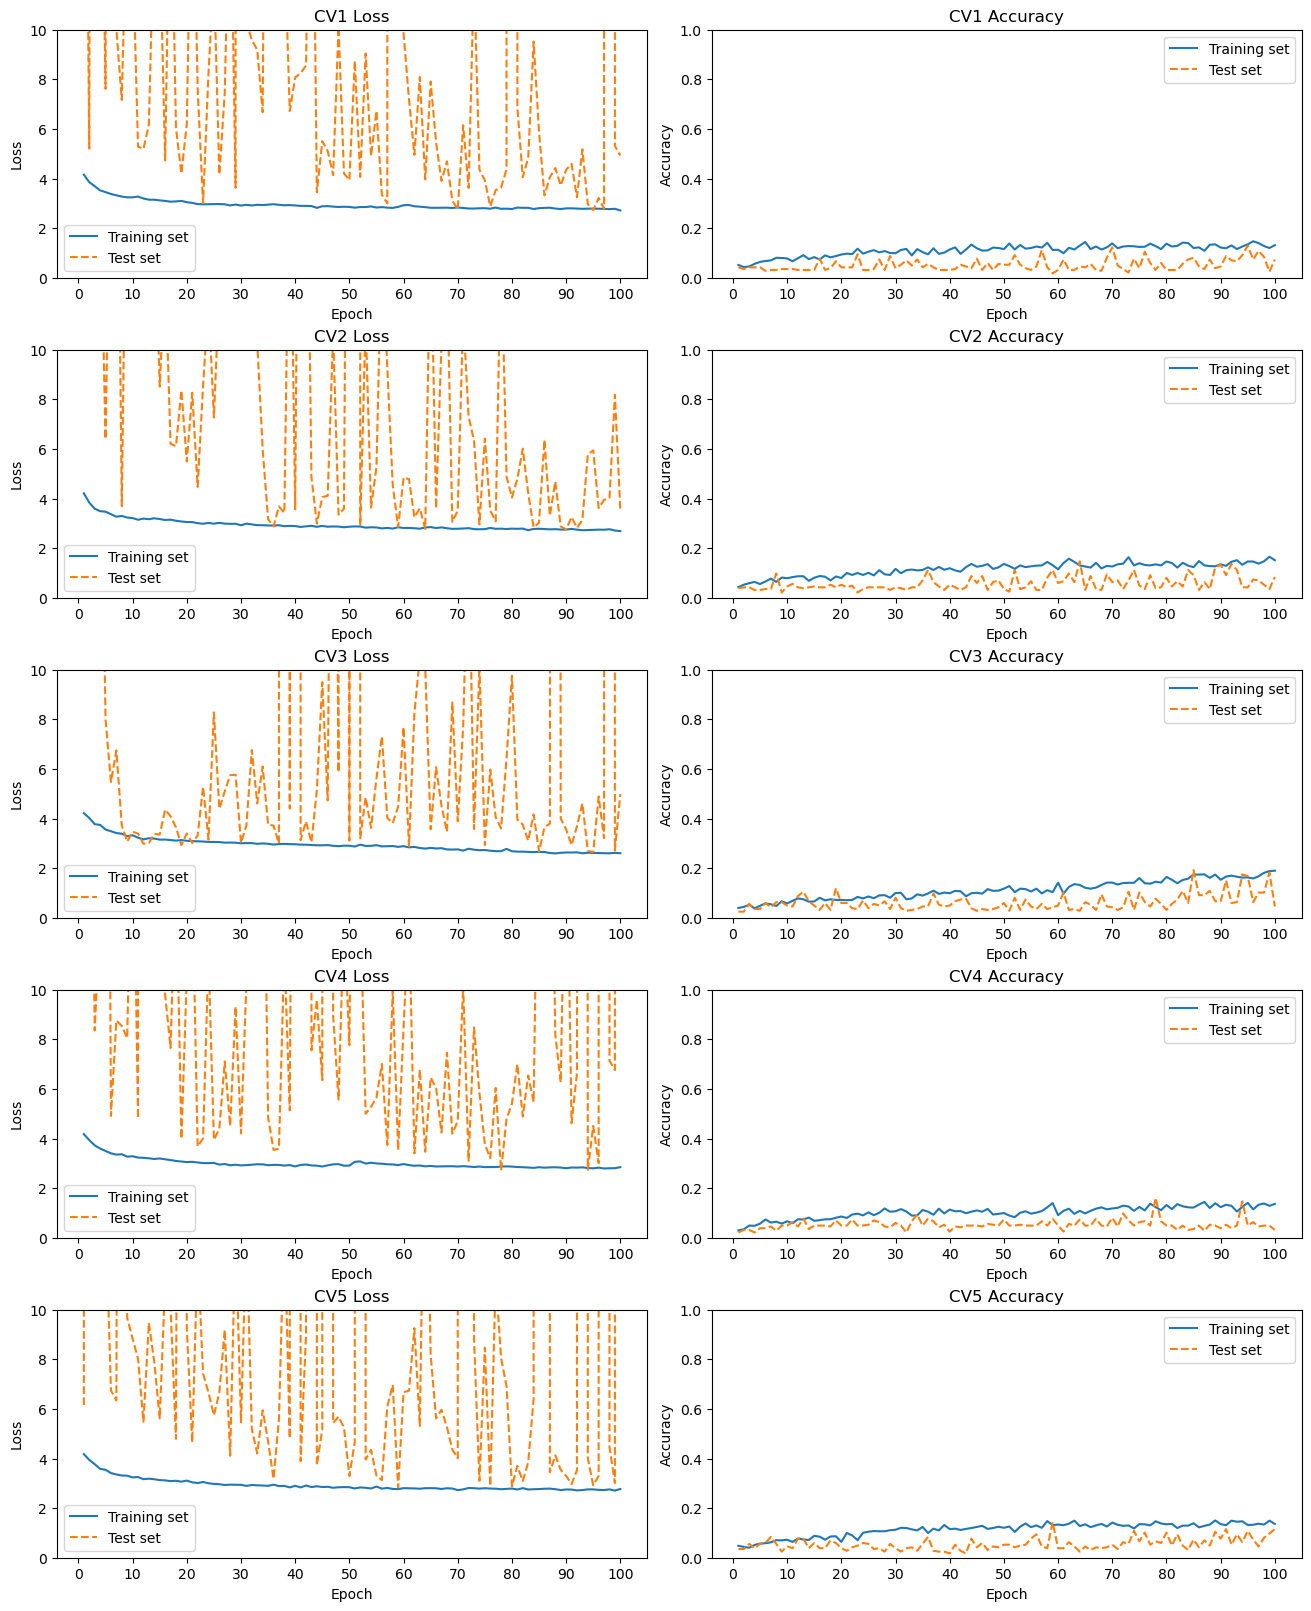

In [14]:
import matplotlib.pyplot as plt

n_epochs = 100
#set the x axis start from 1
x_axis = np.arange(1,101)

fig, ax = plt.subplots(5,2,constrained_layout=True, figsize=(13,16))

for i in range(5):
    for j in range(2):
        if(j==0):
            ax[i,j].set_title('CV' +str(i+1) + ' Loss')
            ax[i,j].set_ylabel('Loss')
            ax[i,j].plot(x_axis, LOSS[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 10))
            ax[i,j].set_xticks(np.arange(0, 101, 10))
            ax[i,j].legend()
        else:
            ax[i,j].set_title('CV' +str(i+1) + ' Accuracy')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylabel('Accuracy')
            ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')    
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 1))
            ax[i,j].set_xticks(np.arange(0, 101, 10))
            ax[i,j].legend()